In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


# Data load

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# Seperate data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train : 25000, x_test : 25000, y_train : 25000, y_test : 25000


# Make model

In [7]:
# output = relu(dot(W, input) + b)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [9]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [10]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
print(f'x_val : {len(x_val)}, y_val : {len(y_val)}')

x_val : 10000, y_val : 10000


# Training

In [13]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8718
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.2958 - acc: 0.9044 - val_loss: 0.2990 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.2159 - acc: 0.9286 - val_loss: 0.3083 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.1740 - acc: 0.9434 - val_loss: 0.2828 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1413 - acc: 0.9541 - val_loss: 0.2862 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1142 - acc: 0.9654 - val_loss: 0.3081 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0969 - acc: 0.9708 - val_loss: 0.3148 - 

acc = Fitting rate
val_acc = Accuracy

validation data는 Test data는 아니지만, 학습이 잘 되고 있는지 확인하는 데이터이다.

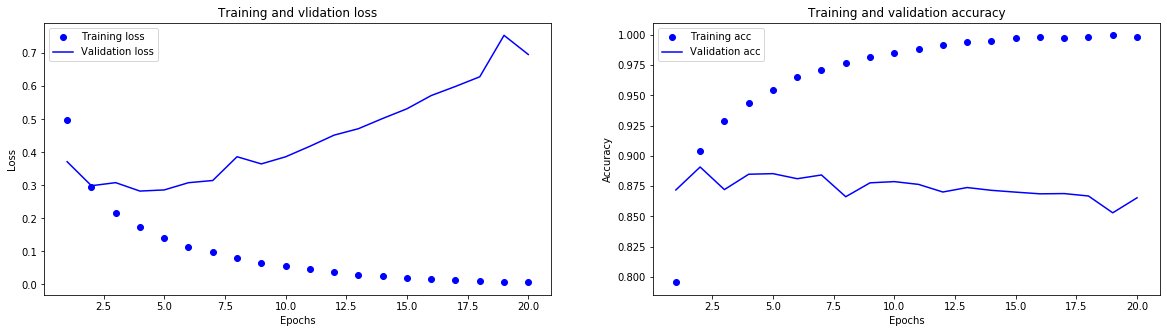

In [14]:
import matplotlib.pyplot as plt
# import seaborn as sns

fig, ax= plt.subplots(1,2, figsize = (20,5))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

ax[0].plot(epochs, loss, 'bo', label = 'Training loss')
ax[0].plot(epochs, val_loss, 'b', label = 'Validation loss')
ax[0].set_title("Training and vlidation loss")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax[1].plot(epochs, acc, 'bo', label = 'Training acc')
ax[1].plot(epochs, val_acc, 'b', label = "Validation acc")
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

After epoch = 4
    There is __overfitting.__

__So, Epoch =4 is the best in this graph.__

# Final model

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.4750 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2655 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.1983 - acc: 0.9295
Epoch 4/4
25000/25000 [==============================] - 1s 56us/step


In [16]:
results

[0.3233700657939911, 0.87352]